# numpy之近似功能函数区分

## np.flatten()  np.reval()  np.reshape()  np.resize()  np.squeeze()

**两者的功能是一致的，将多维数组降为一维。**
**两者的区别是返回拷贝还是返回视图。**

np.flatten(0返回一份拷贝，对拷贝所做修改不会影响原始矩阵。

np.ravel()返回的是视图，修改时会影响原始矩阵

官网上这样写到** **"如果结果中的值在原始数组中是连续的，则ravel 不会生成底层数值的副本”**，度娘后，发现大部分的说法都是得到原数组的视图，但是按照书上的说法，是可以产生副本的，只要结果的值在原始数组中不连续。

刚开始不太理解，这里所谓的连续是指什么？后来发现，**这个连续是指的是元素顺序，reval()中有个参数【order】，这个参数指定了重塑顺序。**
```
In [58]: arr2                                                                                                            
Out[58]: 

array([[ 1,  1, -1],
       [ 0, -3,  6]])     # arr2 默认安装C顺序展开

In [59]: arr3 = np.ravel(arr2,order = 'C')     # C顺序，即是按行方向顺序                                                                           
In [60]: arr3                                                                                                            
Out[60]: array([ 1,  1, -1,  0, -3,  6])    # arr2,arr3都是按照C顺序展开

In [72]: arr3.base is arr2        # arr3基于arr2                                                                                       
Out[72]: True

In [73]: np.may_share_memory(arr2,arr3)   # arr3,arr2共享内存，则arr3为arr2的视图                                                                                  
Out[73]: True
```
```
In [62]: arr4 = np.ravel(arr2,order = 'F')   #arr4 按照F顺序，即是列顺序重塑                                                                            
In [63]: arr4                                                                                                            
Out[63]: array([ 1,  0,  1, -3, -1,  6])    #可以看出顺序与arr2的不同

In [64]: arr4.base is arr2         #arr4 不是基于arr2                                                                                      
Out[64]: False

In [65]: np.may_share_memory(arr2,arr4)     #arr4,arr2  不共享内存                                                                             
Out[65]: False

In [74]: arr4.flags.owndata   #arr4拥有自己的数据，说明独立于arr2，是一个副本                                                                                         
Out[74]: True
```
```
In [66]: arr5 = np.ravel(arr2.T, order='A')  #A顺序，应该是针对于转置后的重塑                                                                            
In [67]: arr5                                                                                                            
Out[67]: array([ 1,  1, -1,  0, -3,  6])   #得到结果顺序与arr2的一致，也是C顺序

In [68]: np.may_share_memory(arr2,arr5)    # arr5,arr2共享内存，则arr5为arr2的视图                                                                              
Out[68]: True
```
```
In [69]: arr6 = np.ravel(arr2.swapaxes(0,1), order='K')  #A顺序，应该是针对于轴交换后的重塑                                                               
In [70]: arr6                                                                                                            
Out[70]: array([ 1,  1, -1,  0, -3,  6]) #得到结果顺序与arr2的一致，也是C顺序

In [71]: np.may_share_memory(arr2,arr6) # arr6,arr2共享内存，则arr6为arr2的视图                                                                                 
Out[71]: True
```
**所以ravel()的结果不一定就是原数组的视图，这个要看具体的情况，不过一般重塑都是使用默认的order参数**，按照C顺序重塑，但是使用时也要注意，避免错把视图当做副本，修改视图影响原本的数组。
或者**直接使用flatten()，不管参数【order】如何都是，返回一份拷贝**，对拷贝所做的修改不会影响（reflects）原始数组，
最后，**也可以通过reshape(-1)使原多维数组转化为一维数组，reshape(x, y)使其转化为其他形状，不过注意使用reshape()都是返回原始数组的视图。**

**总结下，
1，reshape() 返回原始数组的视图；
2，ravel() 返回原始数据的视图或者副本，只有在参数order = ‘F’时返回副本；
3，flatten() 返回原始数组的副本；**


摘自：https://blog.csdn.net/yangjjuan/article/details/103690716

numpy中的ravel()、flatten()、squeeze()都有将多维数组转换为一维数组的功能，区别：

**ravel()：如果没有必要，不会产生源数据的副本**

**flatten()：返回源数据的副本**

**squeeze()：只能对维数为1的维度降维**

**另外，reshape(-1)也可以“拉平”多维数组**

## 组合(stack)不同的数组

几种方法可以沿不同轴将数组堆叠在一起：

>>> a = floor(10*random.random((2,2)))
>>> a
array([[ 1.,  1.],
       [ 5.,  8.]])
>>> b = floor(10*random.random((2,2)))
>>> b
array([[ 3.,  3.],
       [ 6.,  0.]])
>>> vstack((a,b))
array([[ 1.,  1.],
       [ 5.,  8.],
       [ 3.,  3.],
       [ 6.,  0.]])
>>> hstack((a,b))
array([[ 1.,  1.,  3.,  3.],
       [ 5.,  8.,  6.,  0.]])

函数column_stack以列将一维数组合成二维数组，它等同与vstack对一维数组。

>>> column_stack((a,b))   # With 2D arrays
array([[ 1.,  1.,  3.,  3.],
       [ 5.,  8.,  6.,  0.]])
>>> a=array([4.,2.])
>>> b=array([2.,8.])
>>> a[:,newaxis]  # This allows to have a 2D columns vector
array([[ 4.],
       [ 2.]])
>>> column_stack((a[:,newaxis],b[:,newaxis]))
array([[ 4.,  2.],
       [ 2.,  8.]])
>>> vstack((a[:,newaxis],b[:,newaxis])) # The behavior of vstack is different
array([[ 4.],
       [ 2.],
       [ 2.],
       [ 8.]])

row_stack函数，另一方面，将一维数组以行组合成二维数组。

对那些维度比二维更高的数组，hstack沿着第二个轴组合，vstack沿着第一个轴组合,concatenate允许可选参数给出组合时沿着的轴。

Note

在复杂情况下，r_[]和c_[]对创建沿着一个方向组合的数很有用，它们允许范围符号(“:”):

>>> r_[1:4,0,4]
array([1, 2, 3, 0, 4])
1
当使用数组作为参数时，r_和c_的默认行为和vstack和hstack很像，但是允许可选的参数给出组合所沿着的轴的代号。

更多函数hstack , vstack, column_stack , row_stack , concatenate , c_ , r_ 参见NumPy示例.

Numpy中提供了**concatenate,append, stack类(包括hsatck、vstack、dstack、row_stack、column_stack),r_和c_**等类和函数用于数组拼接的操作。
各种函数的特点和区别如下标：

concatenate	       提供了axis参数，用于指定拼接方向
append	           默认先ravel再拼接成一维数组，也可指定axis
stack	           提供了axis参数，用于生成新的维度
hstack	           水平拼接，沿着行的方向，对列进行拼接
vstack	           垂直拼接，沿着列的方向，对行进行拼接
dstack	           沿着第三个轴（深度方向）进行拼接
column_stack	   水平拼接，沿着行的方向，对列进行拼接
row_stack	       垂直拼接，沿着列的方向，对行进行拼接
r_	               垂直拼接，沿着列的方向，对行进行拼接
c_	               水平拼接，沿着行的方向，对列进行拼接

#### 维度和轴
在正确理解Numpy中的数组拼接、合并操作之前，有必要认识下维度和轴的概念：
ndarray(多维数组)是Numpy处理的数据类型。多维数组的维度即为对应数据所在的空间维度，1维可以理解为直线空间，2维可以理解为平面空间，3维可以理解为立方体空间。

轴是用来对多维数组所在空间进行定义、描述的一组正交化的直线，根据数学惯例可以用i,j,k来表示。
在一维空间中，用一个轴就可以表示清楚，numpy中规定为axis 0，空间内的数可以理解为直线空间上的离散点 (xi, )。
在二维空间中，需要用两个轴表示，numpy中规定为axis 0和axis 1，空间内的数可以理解为平面空间上的离散点（xi，yj）。
在三维空间中，需要用三个轴才能表示清楚，在二维空间的基础上numpy中又增加了axis 2，空间内的数可以理解为立方体空间上的离散点（xi，yj，zk）。

Python中可以用numpy中的ndim和shape来分别查看维度，以及在对应维度上的长度。直观上可以根据符号“[ ]”的层数来判断，有m层即为m维，最外面1层对应axis0， 依次为axis1，axis2…
```
>>> a = np.array([1,2,3])
>>> a.ndim      # 一维数组
1
>>> a.shape     # 在这个维度上的长度为3
(3,)

>>> b = np.array([[1,2,3], [4,5,6]])
>>> b.ndim     # 二维数组
2
>>> b.shape      # 在axis 0 上的长度为2， 在axis 1上的长度为3.或者可以感性的理解为2行3列
(2, 3)

>>> c = np.array([[[1,2,3], [4,5,6]]])
>>> c.ndim     # 三维数组
3
>>> c.shape      # 在axis 0 上的长度为1，在axis 1上的长度为2, 在axis 2上的长度为3. 或者可以感性的理解为1层2行3列
(1, 2, 3)
```
#### np.concatenate()
concatenate(a_tuple, axis=0, out=None)
"""
参数说明：
a_tuple:对需要合并的数组用元组的形式给出
axis: 沿指定的轴进行拼接，默认0，即第一个轴
"""

```
>>> import numpy as np
>>> ar1 = np.array([[1,2,3], [4,5,6]])
>>> ar2 = np.array([[7,8,9], [11,12,13]])
>>> ar1
array([[1, 2, 3],
       [4, 5, 6]])
>>> ar2
array([[ 7,  8,  9],
       [11, 12, 13]])

>>> np.concatenate((ar1, ar2))   # 这里的第一轴(axis 0)是行方向
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [11, 12, 13]])

>>> np.concatenate((ar1, ar2),axis=1)   # 这里沿第二个轴，即列方向进行拼接
array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 11, 12, 13]])

>>> ar3 = np.array([[14,15,16]])  # shape为（1，3）的2维数组
>>> np.concatenate((ar1, ar3))   # 一般进行concatenate操作的array的shape需要一致，当然如果array在拼接axis方向的size不一样，也可以完成
>>> np.concatenate((ar1, ar3))  # ar3虽然在axis0方向的长度不一致，但axis1方向上一致，所以沿axis0可以拼接
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [14, 15, 16]])
>>> np.concatenate((ar1, ar3), axis=1)    # ar3和ar1在axis0方向的长度不一致，所以报错
```
#### pd.append()
append(arr, values, axis=None)
"""
参数说明：
arr：array_like的数据
values: array_like的数据，若axis为None，则先将arr和values进行ravel扁平化,再拼接；否则values应当与arr的shape一致，或至多
        在拼接axis的方向不一致
axis：进行append操作的axis的方向，默认无
"""

```
>>> np.append(ar1, ar2)    # 先ravel扁平化再拼接，所以返回值为一个1维数组
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13])

>>> np.append(ar1, ar2, axis=0)     # 沿第一个轴拼接，这里为行的方向 
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [11, 12, 13]])

>>> np.append(ar1, ar2, axis=1)     # 沿第二个轴拼接，这里为列的方向 
array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 11, 12, 13]])
```

#### np.stack()
stack(arrays, axis=0, out=None)
"""
沿着指定的axis对arrays(每个array的shape必须一样)进行拼接，返回值的维度比原arrays的维度高1
axis：默认为0，即第一个轴，若为-1即为第二个轴
"""

```
>>> np.stack((ar1, ar2))     # 增加第一个维度（axis0，之后的axis向后顺延：0—>1, 1—>2）
array([[[ 1,  2,  3],
        [ 4,  5,  6]],
       [[ 7,  8,  9],
        [11, 12, 13]]])

>>> np.stack((ar1, ar2), axis=1)     # 增加第二个维度（axis1，之后的axis向后顺延, 1—>2）
array([[[ 1,  2,  3],
        [ 7,  8,  9]],
       [[ 4,  5,  6],
        [11, 12, 13]]])

>>> np.stack((ar1, ar2), axis=2)     # 增加第三个维度（axis2，和axis=-1的效果一样，原来的axis0和axis1保持不变）
array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],
       [[ 4, 11],
        [ 5, 12],
        [ 6, 13]]])
```
关于维度增加的一种理解方式

#### hstack、vstack和vstack
```
>>> np.hstack((ar1,ar2))    # 水平拼接，沿着行的方向，对列进行拼接
array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 11, 12, 13]])

>>> np.vstack((ar1,ar2))    # 垂直拼接，沿着列的方向，对行进行拼接
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [11, 12, 13]])
       
>>> np.dstack((ar1,ar2))    # 对于2维数组来说，沿着第三轴（深度方向）进行拼接, 效果相当于stack(axis=-1)
array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],
       [[ 4, 11],
        [ 5, 12],
        [ 6, 13]]])
```

#### column_stack和row_stack
```
>>> np.column_stack((ar1,ar2))   # 水平拼接，沿着行的方向，对列进行拼接
array([[ 1,  2,  3,  7,  8,  9],
      [ 4,  5,  6, 11, 12, 13]])

>>> np.row_stack((ar1,ar2))    # 垂直拼接，沿着列的方向，对行进行拼接
array([[ 1,  2,  3],
      [ 4,  5,  6],
      [ 7,  8,  9],
      [11, 12, 13]])
```

#### np.r_ 和np.c_
常用于快速生成ndarray数据
```
>>> np.r_[ar1,ar2]     # 垂直拼接，沿着列的方向，对行进行拼接
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [11, 12, 13]])
  
>>> np.c_[ar1,ar2]   # 水平拼接，沿着行的方向，对列进行拼接
array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 11, 12, 13]])
```

#### 总结
对于两个shape一样的二维array来说:

**增加行（对行进行拼接）的方法有：**
np.concatenate((ar1, ar2),axis=0)
np.append(ar1, ar2, axis=0)
np.vstack((ar1,ar2))
np.row_stack((ar1,ar2))
np.r_[ar1,ar2]

**增加列（对列进行拼接）的方法有：**
np.concatenate((ar1, ar2),axis=1)
np.append(ar1, ar2, axis=1)
np.hstack((ar1,ar2))
np.column_stack((ar1,ar2))
np.c_[ar1,ar2]

摘自：https://blog.csdn.net/guofei_fly/article/details/85485173?utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromMachineLearnPai2%7Edefault-1.control&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromMachineLearnPai2%7Edefault-1.control

要循环添加元素最好使用append然后concatenate起来（axis=0）

或者使用zeros(0,3)等方法先建立空数据，但是保证要堆叠的维度一样长，比如这里的列是3，即为堆叠的维度，行为0，即为要增加的数据再行上面。然后再直接使用concatenate循环来堆叠元素

但是使用append方式对于深度学习读取大量数据的时候会很慢，因为每次都会把之前的数组复制给一个新的数组，在后期该数组很大的情况时速度明显会减慢很多，所以对于深度学习里面最好不用append，这里想法是先给定数组大小，庵后往里面填数据就可以了。

## numpy矩阵添加一行或一列

refs:

[numpy矩阵添加一行或一列](https://blog.csdn.net/zzzzlei123123123/article/details/100152883)

### np.c_ | np.r_

In [2]:
import numpy as np

a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[0,0,0]])
c = np.r_[a,b]
d = np.c_[a,b.T]

print(f'c: {c}')
print(f'd: {d}')

c: [[1 2 3]
 [4 5 6]
 [7 8 9]
 [0 0 0]]
d: [[1 2 3 0]
 [4 5 6 0]
 [7 8 9 0]]


将切片对象转换为沿第二轴的连接。这是简单的，因为它很常见，所以很有用。特别是，阵列将在升级到至少2-D后沿着它们的最后一个轴堆叠，其中1个后置为形状（由1-D阵列制成的列向量）
+ 该方法只能将两个矩阵合并
+ 注意要合并的两矩阵的行列关系

### np.insert

In [6]:
import numpy as np
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[0,0,0]])
c = np.insert(a, 0, values=b, axis=0)
d = np.insert(a, 0, values=b, axis=1)
print(f'c: {c}')
print(f'd: {d}')

c: [[0 0 0]
 [1 2 3]
 [4 5 6]
 [7 8 9]]
d: [[0 1 2 3]
 [0 4 5 6]
 [0 7 8 9]]


+ 这种是将一个集合插入到一个矩阵中，对于b可以是列表或元组，它仅仅提供要插入的值，但个数要对
+ np.insert的第二个参数是插入的位置，axis用来控制是插入行还是列，可见该方法非常灵活！

### np.row_stack | np.colum_stack

In [9]:
import numpy as np
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[0,0,0]])
c = np.row_stack((a,b))
d = np.column_stack((a,b.T))

+ 类似于c_， r_

## 判断两个list相等

In [10]:
import operator
 
a=[1,-1,0]
b=[1,-1,0]
c=[-1,1,0]
print(operator.eq(a,b))
print(operator.eq(a,c))

True
False


Python2可以使用cmp()函数，但是在Python3中我们可以使用下面的方法来比较两个list是否相等;

两个列表必须完全相同（包括位置），只有这样才能是True。

## 矩阵乘积运算(multiply/maumul/*/@)解析

在训练数据时经常涉及到矩阵运算，有段时间没有练习过了，手便生疏了，今天重新测了一把，python中各类矩阵运算举例如下，可以清楚的看到tf.matmul(A,C)=np.dot(A,C)= A@C都属于叉乘，而tf.multiply(A,C)= A*C=A∙C属于点乘。

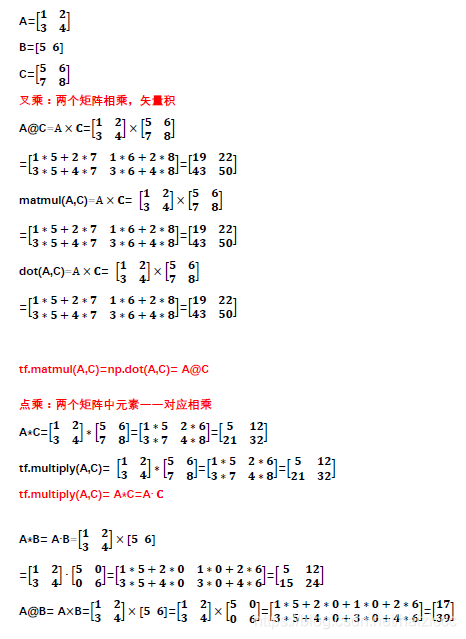

In [13]:
import torch
import numpy as np

a = np.array([[1,2],[3,4]])
b = np.array([5,6])
c = np.array([[5,6],[7,8]])
print('a:'+'\n',a)
print('b:'+'\n',b)
print('c:'+'\n',c)
#叉乘
d1=a@c
d2=torch.matmul(torch.FloatTensor(a),torch.FloatTensor(c))
d3=np.dot(a,c)
#点乘
f1=a*c
f2=torch.multiply(torch.FloatTensor(a),torch.FloatTensor(c))

print('d1:叉乘a@c' + '\n', d1)
print('d2:叉乘matmul(a,c)' + '\n', d2)
print('d3:叉乘dot(a,c)' + '\n', d3)
print('f1:点乘a*c' + '\n', f1)
print('f2:点乘multiply(a,c)' + '\n', f2)

a:
 [[1 2]
 [3 4]]
b:
 [5 6]
c:
 [[5 6]
 [7 8]]
d1:叉乘a@c
 [[19 22]
 [43 50]]
d2:叉乘matmul(a,c)
 tensor([[19., 22.],
        [43., 50.]])
d3:叉乘dot(a,c)
 [[19 22]
 [43 50]]
f1:点乘a*c
 [[ 5 12]
 [21 32]]
f2:点乘multiply(a,c)
 tensor([[ 5., 12.],
        [21., 32.]])
